In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv("data.csv")

In [2]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


accpets diagnosis all are independet variable and diagonosis is dependet

Benign 357
Malignanat 212


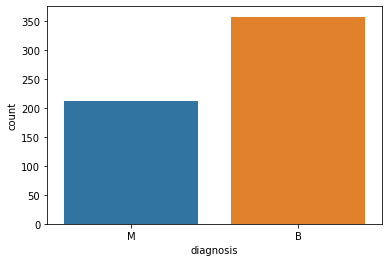

In [5]:
import seaborn as sns
import matplotlib as plt
ax = sns.countplot(data['diagnosis'], label="count")
B, M = data['diagnosis'].value_counts()
print('Benign', B)
print('Malignanat', M)

Deleting atribute 32

In [7]:
del data['Unnamed: 32']

## Data Preprocessing

In [8]:
X = data.iloc[:, 2:].values #independent variables
y = data.iloc[:, 1].values #dependent variables

### Encoding categorical data

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

### spliting data set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0) 

### feature scaling

get data in standardize form

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train #input vlaues from neural network is always on between 0 but not 0

array([[-0.52787029,  2.49821982, -0.59939466, ..., -1.74713139,
        -0.79044533, -0.91054389],
       [-0.55333608,  0.29431013, -0.60759343, ..., -0.62275667,
        -0.33646358, -0.83551633],
       [ 2.15452653,  0.40392257,  2.26525805, ...,  1.03846122,
        -0.11504791,  0.26488788],
       ...,
       [-1.3297598 , -0.21876938, -1.32088704, ..., -0.98271999,
        -0.718764  , -0.13637062],
       [-1.24940108, -0.24209117, -1.2835826 , ..., -1.74713139,
        -1.58690456, -1.01280367],
       [-0.74291476,  1.08958336, -0.71827692, ..., -0.2865488 ,
        -1.26354211,  0.19486216]])

In [14]:
X_test

array([[-0.20813312,  0.29431013, -0.13944326, ...,  1.35620942,
         1.08282676,  1.50534354],
       [-0.26189423,  1.39743106, -0.3255555 , ..., -0.83852283,
        -0.73469319, -0.8855347 ],
       [-0.0327021 , -0.83912914, -0.10049907, ..., -0.50397936,
        -1.22531207, -0.92888396],
       ...,
       [-0.47410917,  0.14738282, -0.47600306, ..., -0.59340278,
        -0.35079984, -0.34311323],
       [-0.75423289, -0.7528385 , -0.77976775, ..., -0.75636222,
        -0.08637538,  0.21209071],
       [-0.79667588,  1.82421992, -0.83142005, ..., -1.43195543,
        -0.08956122, -0.71936255]])

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense

### Adding the input and first hidden layer

1. Weight initialization technique is uniform distribution
2. Activation function in hidden layer is relu
3. activation function for output layer is sigmoid

In [26]:
classifier = Sequential()
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))#input layers input dim and output layers are hidden layer

C:\Users\vishal\AppData\Local\Continuum\anaconda3\envs\data_s\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  


### Adding second hidden layer

In [27]:
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))#input layers input dim and output layers are hidden layer

C:\Users\vishal\AppData\Local\Continuum\anaconda3\envs\data_s\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


### Adding the output layer

In [28]:
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))#input layers input dim and output layers are hidden laye

C:\Users\vishal\AppData\Local\Continuum\anaconda3\envs\data_s\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [29]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [32]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])#if ouptut is binary you can use cross binary_cross_entropy or output is multiple you can use multiple_cross_etropy

W0625 21:38:52.547220 28428 module_wrapper.py:139] From C:\Users\vishal\AppData\Local\Continuum\anaconda3\envs\data_s\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0625 21:38:52.551812 28428 deprecation.py:323] From C:\Users\vishal\AppData\Local\Continuum\anaconda3\envs\data_s\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [33]:
classifier.fit(X_train, y_train, batch_size=100, nb_epoch=150)

C:\Users\vishal\AppData\Local\Continuum\anaconda3\envs\data_s\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0625 21:40:24.851424 28428 module_wrapper.py:139] From C:\Users\vishal\AppData\Local\Continuum\anaconda3\envs\data_s\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0625 21:40:24.904559 28428 module_wrapper.py:139] From C:\Users\vishal\AppData\Local\Continuum\anaconda3\envs\data_s\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W0625 21:40:24.950478 28428 module_wrapper.py:139] From C:\Users\vishal\AppData\Local\Continuum\anaconda3\envs\data_s\lib\site-packages\keras\backend\tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0625

Epoch 1/150


W0625 21:40:26.129632 28428 module_wrapper.py:139] From C:\Users\vishal\AppData\Local\Continuum\anaconda3\envs\data_s\lib\site-packages\keras\backend\tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0625 21:40:26.130288 28428 module_wrapper.py:139] From C:\Users\vishal\AppData\Local\Continuum\anaconda3\envs\data_s\lib\site-packages\keras\backend\tensorflow_backend.py:199: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.

W0625 21:40:26.298877 28428 module_wrapper.py:139] From C:\Users\vishal\AppData\Local\Continuum\anaconda3\envs\data_s\lib\site-packages\keras\backend\tensorflow_backend.py:206: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



512/512 [==============================] - 2s 3ms/step - loss: 0.6928 - acc: 0.5605
Epoch 2/150
512/512 [==============================] - 0s 18us/step - loss: 0.6911 - acc: 0.6289
Epoch 3/150
512/512 [==============================] - 0s 24us/step - loss: 0.6884 - acc: 0.6309
Epoch 4/150
512/512 [==============================] - 0s 19us/step - loss: 0.6839 - acc: 0.6563
Epoch 5/150
512/512 [==============================] - 0s 20us/step - loss: 0.6760 - acc: 0.7324
Epoch 6/150
512/512 [==============================] - 0s 23us/step - loss: 0.6636 - acc: 0.8457
Epoch 7/150
512/512 [==============================] - 0s 22us/step - loss: 0.6446 - acc: 0.9023
Epoch 8/150
512/512 [==============================] - 0s 21us/step - loss: 0.6186 - acc: 0.9238
Epoch 9/150
512/512 [==============================] - 0s 23us/step - loss: 0.5835 - acc: 0.9297
Epoch 10/150
512/512 [==============================] - 0s 19us/step - loss: 0.5401 - acc: 0.9355
Epoch 11/150
512/512 [====================

512/512 [==============================] - 0s 22us/step - loss: 0.0500 - acc: 0.9863
Epoch 85/150
512/512 [==============================] - 0s 18us/step - loss: 0.0493 - acc: 0.9863
Epoch 86/150
512/512 [==============================] - 0s 23us/step - loss: 0.0491 - acc: 0.9863
Epoch 87/150
512/512 [==============================] - 0s 23us/step - loss: 0.0487 - acc: 0.9863
Epoch 88/150
512/512 [==============================] - 0s 17us/step - loss: 0.0483 - acc: 0.9863
Epoch 89/150
512/512 [==============================] - 0s 24us/step - loss: 0.0479 - acc: 0.9863
Epoch 90/150
512/512 [==============================] - 0s 22us/step - loss: 0.0478 - acc: 0.9863
Epoch 91/150
512/512 [==============================] - 0s 26us/step - loss: 0.0474 - acc: 0.9883
Epoch 92/150
512/512 [==============================] - 0s 28us/step - loss: 0.0472 - acc: 0.9883
Epoch 93/150
512/512 [==============================] - 0s 20us/step - loss: 0.0469 - acc: 0.9883
Epoch 94/150
512/512 [===========

### Convert predict in binary form

In [34]:
#predict the test set
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

In [35]:
#Making the accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

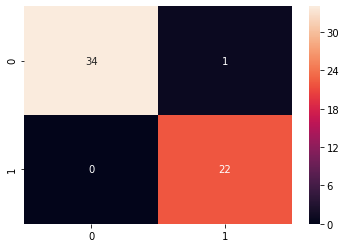

In [36]:
sns.heatmap(cm, annot=True)